### **INFOSYS SPRINGBOARD TASK 1**

IMPORTING REQUIRED LIBRARIES & DATASET

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer 

In [145]:
data = pd.read_csv('C:\\Users\\Kamlesh P Panchal\\Documents\\Infosys Internship\\train_og\\Train.csv')
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### **1. IMPUTATION OF MISSING VALUES**

In [146]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [147]:
# Calculating the mean of 'Item_Visibility' for entries where it is greater than 0
non_zero_mean = data.loc[data['Item_Visibility'] > 0, 'Item_Visibility'].mean()

In [148]:
# Filling missing values in 'Item_Weight' with the median weight
data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace=True)

In [149]:
# Filling missing values in 'Outlet_Size' with the most frequent value (mode)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

In [150]:
# Fixing  inconsistencies in the 'Item_Fat_Content' column by standardizing the labels
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [151]:
# Checking for duplicates and removing them if any
data.drop_duplicates(inplace=True)

In [152]:
# rechecking again if we find any missing values
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### **2. CATEGORICAL VARIABLE ENCODING**

In [153]:
# Nominal columns (categorical without order)
nominal_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
                   'Outlet_Identifier', 'Outlet_Location_Type', 
                   'Outlet_Type'] 

# Ordinal columns (categorical with order)
ordinal_columns = ['Outlet_Size']  

# Continuous (Numerical columns)
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                    'Item_Outlet_Sales', 'Outlet_Establishment_Year']  

# printing them seperatly
print("Nominal Columns: ", nominal_columns)
print("Ordinal Columns: ", ordinal_columns)
print("Numerical Columns: ", numerical_columns)

Nominal Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns:  ['Outlet_Size']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']


In [154]:
# mapping the ordinal encoding
Outlet_Size_mapping = ['Small', 'Medium', 'High'] 

In [155]:
# Creating encoders and scaler
ohe = OneHotEncoder(sparse_output=False)  # For nominal columns
ode = OrdinalEncoder(categories=[Outlet_Size_mapping])  # For ordinal column
scaler = StandardScaler()  # For numeric columns

In [156]:
# Creating the column transformer
ct = make_column_transformer(
    (ohe, ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
            'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']),  # Nominal columns
    (ode, ['Outlet_Size']),  # Ordinal column
    (scaler, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
              'Outlet_Establishment_Year', 'Item_Outlet_Sales']),  # Numeric columns
    remainder='passthrough'
)

ct.set_output(transform= 'pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Item_Identifier', 'Item_Fat_Content',
                                  'Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Small', 'Medium',
                                                             'High']]),
                                 ['Outlet_Size']),
                                ('standardscaler', StandardScaler(),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year',
                                  'Item_Outlet_Sales'])])

In [157]:
df_encoded = ct.fit_transform(data)
df_encoded

,onehotencoder__Item_Identifier_DRA12,onehotencoder__Item_Identifier_DRA24,onehotencoder__Item_Identifier_DRA59,onehotencoder__Item_Identifier_DRB01,onehotencoder__Item_Identifier_DRB13,onehotencoder__Item_Identifier_DRB24,onehotencoder__Item_Identifier_DRB25,onehotencoder__Item_Identifier_DRB48,onehotencoder__Item_Identifier_DRC01,onehotencoder__Item_Identifier_DRC12,...,onehotencoder__Outlet_Type_Grocery Store,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2,onehotencoder__Outlet_Type_Supermarket Type3,ordinalencoder__Outlet_Size,standardscaler__Item_Weight,standardscaler__Item_Visibility,standardscaler__Item_MRP,standardscaler__Outlet_Establishment_Year,standardscaler__Item_Outlet_Sales
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.831187,-0.970732,1.747454,0.139541,0.910601
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-1.630810,-0.908111,-1.489023,1.334103,-1.018440
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.108727,-0.956917,0.010040,0.139541,-0.049238
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.510904,-1.281758,0.660050,0.020085,-0.849103
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,-0.918719,-1.281758,-1.399220,-1.293934,-0.695373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,-1.407246,-0.181193,1.180783,-1.293934,0.349915
8519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-1.048835,-0.371154,-0.527301,0.497909,-0.956402
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.523639,-0.599784,-0.897208,0.736822,-0.579100
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-1.325628,1.532880,-0.607977,1.334103,-0.196725


### **3. FEATURE DERIVATION**

In [158]:
# Feature Derivation: Creating a new feature for the store's age
data['Outlet_Age'] = 2024 - data['Outlet_Establishment_Year']

data[['Outlet_Establishment_Year', 'Outlet_Age']].head()

,Outlet_Establishment_Year,Outlet_Age
0,1999,25
1,2009,15
2,1999,25
3,1998,26
4,1987,37


### **4. OUTLIER TREATMENT**

In [159]:
from scipy import stats

In [160]:
data.shape

(8523, 13)

Using Z-Score Method

Item_Weight: 0 outliers detected.
Item_Visibility: 146 outliers detected.
Item_MRP: 0 outliers detected.
Item_Outlet_Sales: 197 outliers detected.


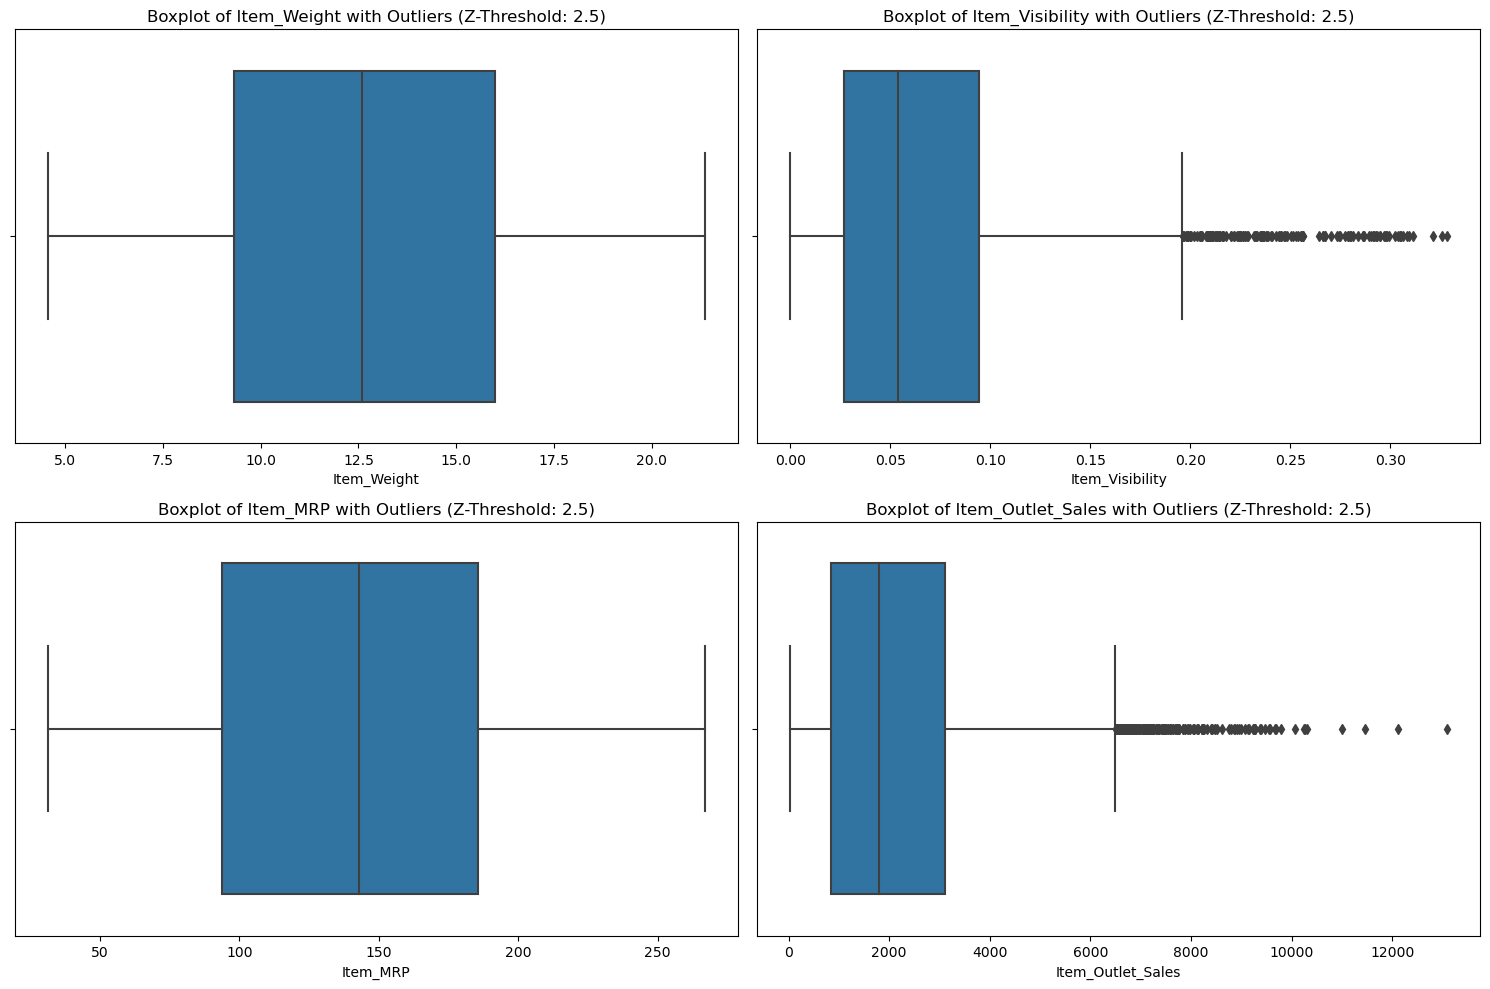

In [161]:
# continuous numerical features
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Z-score threshold
z_threshold = 2.5  # as 3 results with 0 outliers & 2 with many so fixed T as 2.5

# outliers based on Z-score for each column
outliers_dict = {}
for col in continuous_columns:
    
    # Z-Score calculation
    data[col + '_zscore'] = np.abs((data[col] - data[col].mean()) / data[col].std())
    
    # outliers where Z-score is greater than threshold
    outliers_dict[col] = data[data[col + '_zscore'] > z_threshold]
    
    # Printing outlier count
    print(f"{col}: {outliers_dict[col].shape[0]} outliers detected.")

plt.figure(figsize=(15, 10))

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)  # Creating a 2x2 grid of plots
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col} with Outliers (Z-Threshold: {z_threshold})')

plt.tight_layout()
plt.show()


In [162]:
# Removing rows where Z-score for 'Item_Outlet_Sales' is greater than the threshold
z_threshold = 2.5
outliers_removed = data[data['Item_Outlet_Sales_zscore'] <= z_threshold]

print(f"Original dataset size: {data.shape}")
print(f"Dataset size after removing outliers: {outliers_removed.shape}")

Original dataset size: (8523, 17)
Dataset size after removing outliers: (8326, 17)


Using IQR Method

In [163]:
''' 
outliers_dict_iqr = {}
for col in continuous_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Defining bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outliers where values are below lower_bound or above upper_bound
    outliers_dict_iqr[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    # Printing outlier count
    print(f"{col}: {outliers_dict_iqr[col].shape[0]} outliers detected using IQR.")

# Removing outliers using IQR for 'Item_Outlet_Sales'
outliers_removed_iqr = data[~((data['Item_Outlet_Sales'] < (data['Item_Outlet_Sales'].quantile(0.25) - 1.5 * (data['Item_Outlet_Sales'].quantile(0.75) - data['Item_Outlet_Sales'].quantile(0.25)))) | 
                             (data['Item_Outlet_Sales'] > (data['Item_Outlet_Sales'].quantile(0.75) + 1.5 * (data['Item_Outlet_Sales'].quantile(0.75) - data['Item_Outlet_Sales'].quantile(0.25)))))]
print(f"Dataset size after removing outliers (IQR): {outliers_removed_iqr.shape}")

'''

' \noutliers_dict_iqr = {}\nfor col in continuous_columns:\n    Q1 = data[col].quantile(0.25)\n    Q3 = data[col].quantile(0.75)\n    IQR = Q3 - Q1\n    \n    # Defining bounds for outliers\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    \n    # Outliers where values are below lower_bound or above upper_bound\n    outliers_dict_iqr[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]\n    \n    # Printing outlier count\n    print(f"{col}: {outliers_dict_iqr[col].shape[0]} outliers detected using IQR.")\n\n# Removing outliers using IQR for \'Item_Outlet_Sales\'\noutliers_removed_iqr = data[~((data[\'Item_Outlet_Sales\'] < (data[\'Item_Outlet_Sales\'].quantile(0.25) - 1.5 * (data[\'Item_Outlet_Sales\'].quantile(0.75) - data[\'Item_Outlet_Sales\'].quantile(0.25)))) | \n                             (data[\'Item_Outlet_Sales\'] > (data[\'Item_Outlet_Sales\'].quantile(0.75) + 1.5 * (data[\'Item_Outlet_Sales\'].quantile(0.75) - data[\'Item_Outlet_Sales\'

In [164]:
# Assuming 'outliers_removed' is cleaned dataset

scaled_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# standardizing the columns
scaler = StandardScaler()
outliers_removed[scaled_columns] = scaler.fit_transform(outliers_removed[scaled_columns])

outliers_removed.head()


C:\Users\Kamlesh P Panchal\AppData\Local\Temp\ipykernel_7584\798813838.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed[scaled_columns] = scaler.fit_transform(outliers_removed[scaled_columns])


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Weight_zscore,Item_Visibility_zscore,Item_MRP_zscore,Item_Outlet_Sales_zscore
0,FDA15,-0.826565,Low Fat,-0.971109,Dairy,1.800763,OUT049,1999,Medium,Tier 1,Supermarket Type1,1.122235,25,0.831138,0.970675,1.747351,0.910548
1,DRC01,-1.621276,Regular,-0.908784,Soft Drinks,-1.476024,OUT018,2009,Medium,Tier 3,Supermarket Type2,-1.074526,15,1.630714,0.908058,1.488936,1.018381
2,FDN15,1.101430,Low Fat,-0.957359,Meat,0.041710,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.029187,25,1.108662,0.956861,0.010040,0.049235
3,FDX07,1.501136,Regular,-1.280664,Fruits and Vegetables,0.699815,OUT010,1998,Medium,Tier 3,Grocery Store,-0.881687,26,1.510816,1.281683,0.660011,0.849053
4,NCD19,-0.913560,Low Fat,-1.280664,Household,-1.385102,OUT013,1987,High,Tier 3,Supermarket Type1,-0.706622,37,0.918665,1.281683,1.399138,0.695332


In [165]:
# Replacing 'data' with the updated dataset (outliers_removed)
data = outliers_removed
data.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Weight_zscore,Item_Visibility_zscore,Item_MRP_zscore,Item_Outlet_Sales_zscore
0,FDA15,-0.826565,Low Fat,-0.971109,Dairy,1.800763,OUT049,1999,Medium,Tier 1,Supermarket Type1,1.122235,25,0.831138,0.970675,1.747351,0.910548
1,DRC01,-1.621276,Regular,-0.908784,Soft Drinks,-1.476024,OUT018,2009,Medium,Tier 3,Supermarket Type2,-1.074526,15,1.630714,0.908058,1.488936,1.018381
2,FDN15,1.101430,Low Fat,-0.957359,Meat,0.041710,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.029187,25,1.108662,0.956861,0.010040,0.049235
3,FDX07,1.501136,Regular,-1.280664,Fruits and Vegetables,0.699815,OUT010,1998,Medium,Tier 3,Grocery Store,-0.881687,26,1.510816,1.281683,0.660011,0.849053


### **5. FEATURE SCALING**

In [166]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to certain numerical features
min_max_scaler = MinMaxScaler()
data[['Item_MRP', 'Item_Visibility']] = min_max_scaler.fit_transform(data[['Item_MRP', 'Item_Visibility']])

# Check the scaled data
data[['Item_MRP', 'Item_Visibility']].head()

C:\Users\Kamlesh P Panchal\AppData\Local\Temp\ipykernel_7584\4232829347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Item_MRP', 'Item_Visibility']] = min_max_scaler.fit_transform(data[['Item_MRP', 'Item_Visibility']])


,Item_MRP,Item_Visibility
0,0.927507,0.048866
1,0.072068,0.058705
2,0.468288,0.051037
3,0.640093,0.000000
4,0.095805,0.000000


### **6. TARGET VARIABLE TRANSFORMATION**

c:\Users\Kamlesh P Panchal\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Kamlesh P Panchal\AppData\Local\Temp\ipykernel_7584\1875580955.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Outlet_Sales_Log'] = np.log1p(data['Item_Outlet_Sales'])


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

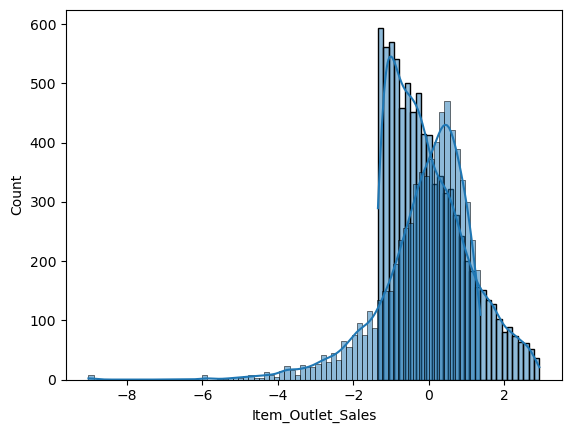

In [167]:
# Investigate the distribution of 'Item_Outlet_Sales'
sns.histplot(data['Item_Outlet_Sales'], kde=True)

# Apply log transformation to address skewness
data['Item_Outlet_Sales_Log'] = np.log1p(data['Item_Outlet_Sales'])

# Check distribution after transformation
sns.histplot(data['Item_Outlet_Sales_Log'], kde=True)
